In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [35]:
Dataframe= pd.read_excel('tech_layoffs.xlsx')
df = Dataframe.copy()
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [36]:
df.rename(columns={'#':'Unique_ID', 'lat':'lattitude', 'lng':'longitude'}, inplace = True)
df.head()

,Unique_ID,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lattitude,longitude
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [37]:
df.isnull().sum()


Unique_ID                        0
Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Laid_Off                       107
Date_layoffs                     0
Percentage                     102
Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Industry                         0
Stage                            0
Money_Raised_in_$_mil           76
Year                             0
lattitude                        0
longitude                        0
dtype: int64

In [38]:
#The above output shows that there are 5 columns that have missing or NaN values present in them. 
#Hence out first step is to clean these 5 columns, we can proceed by filling the columns with its mean/Average values
fill_values = df[['Laid_Off', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Percentage']]
for column in fill_values:
    df[column]= df[column].fillna(df[column].mean())

In [39]:
df.isnull().sum()

Unique_ID                       0
Company                         0
Location_HQ                     0
Country                         0
Continent                       0
Laid_Off                        0
Date_layoffs                    0
Percentage                      0
Company_Size_before_Layoffs     0
Company_Size_after_layoffs      0
Industry                        0
Stage                           0
Money_Raised_in_$_mil          76
Year                            0
lattitude                       0
longitude                       0
dtype: int64

In [41]:
# cleaning the column 'Money_Raised_in_mil' will require to convert into int as $ symbol makes it a string data type
df['Money_Raised_in_$_mil'].fillna('$0', inplace = True)
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].astype(float)
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].replace(0, (df['Money_Raised_in_$_mil'].mean()) , regex=False).astype(int)

In [42]:
print(df.isnull().sum())

Unique_ID                      0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lattitude                      0
longitude                      0
dtype: int64


In [9]:
#converting the date column into a date-time format
df['Date_layoffs']= pd.to_datetime(df['Date_layoffs'])

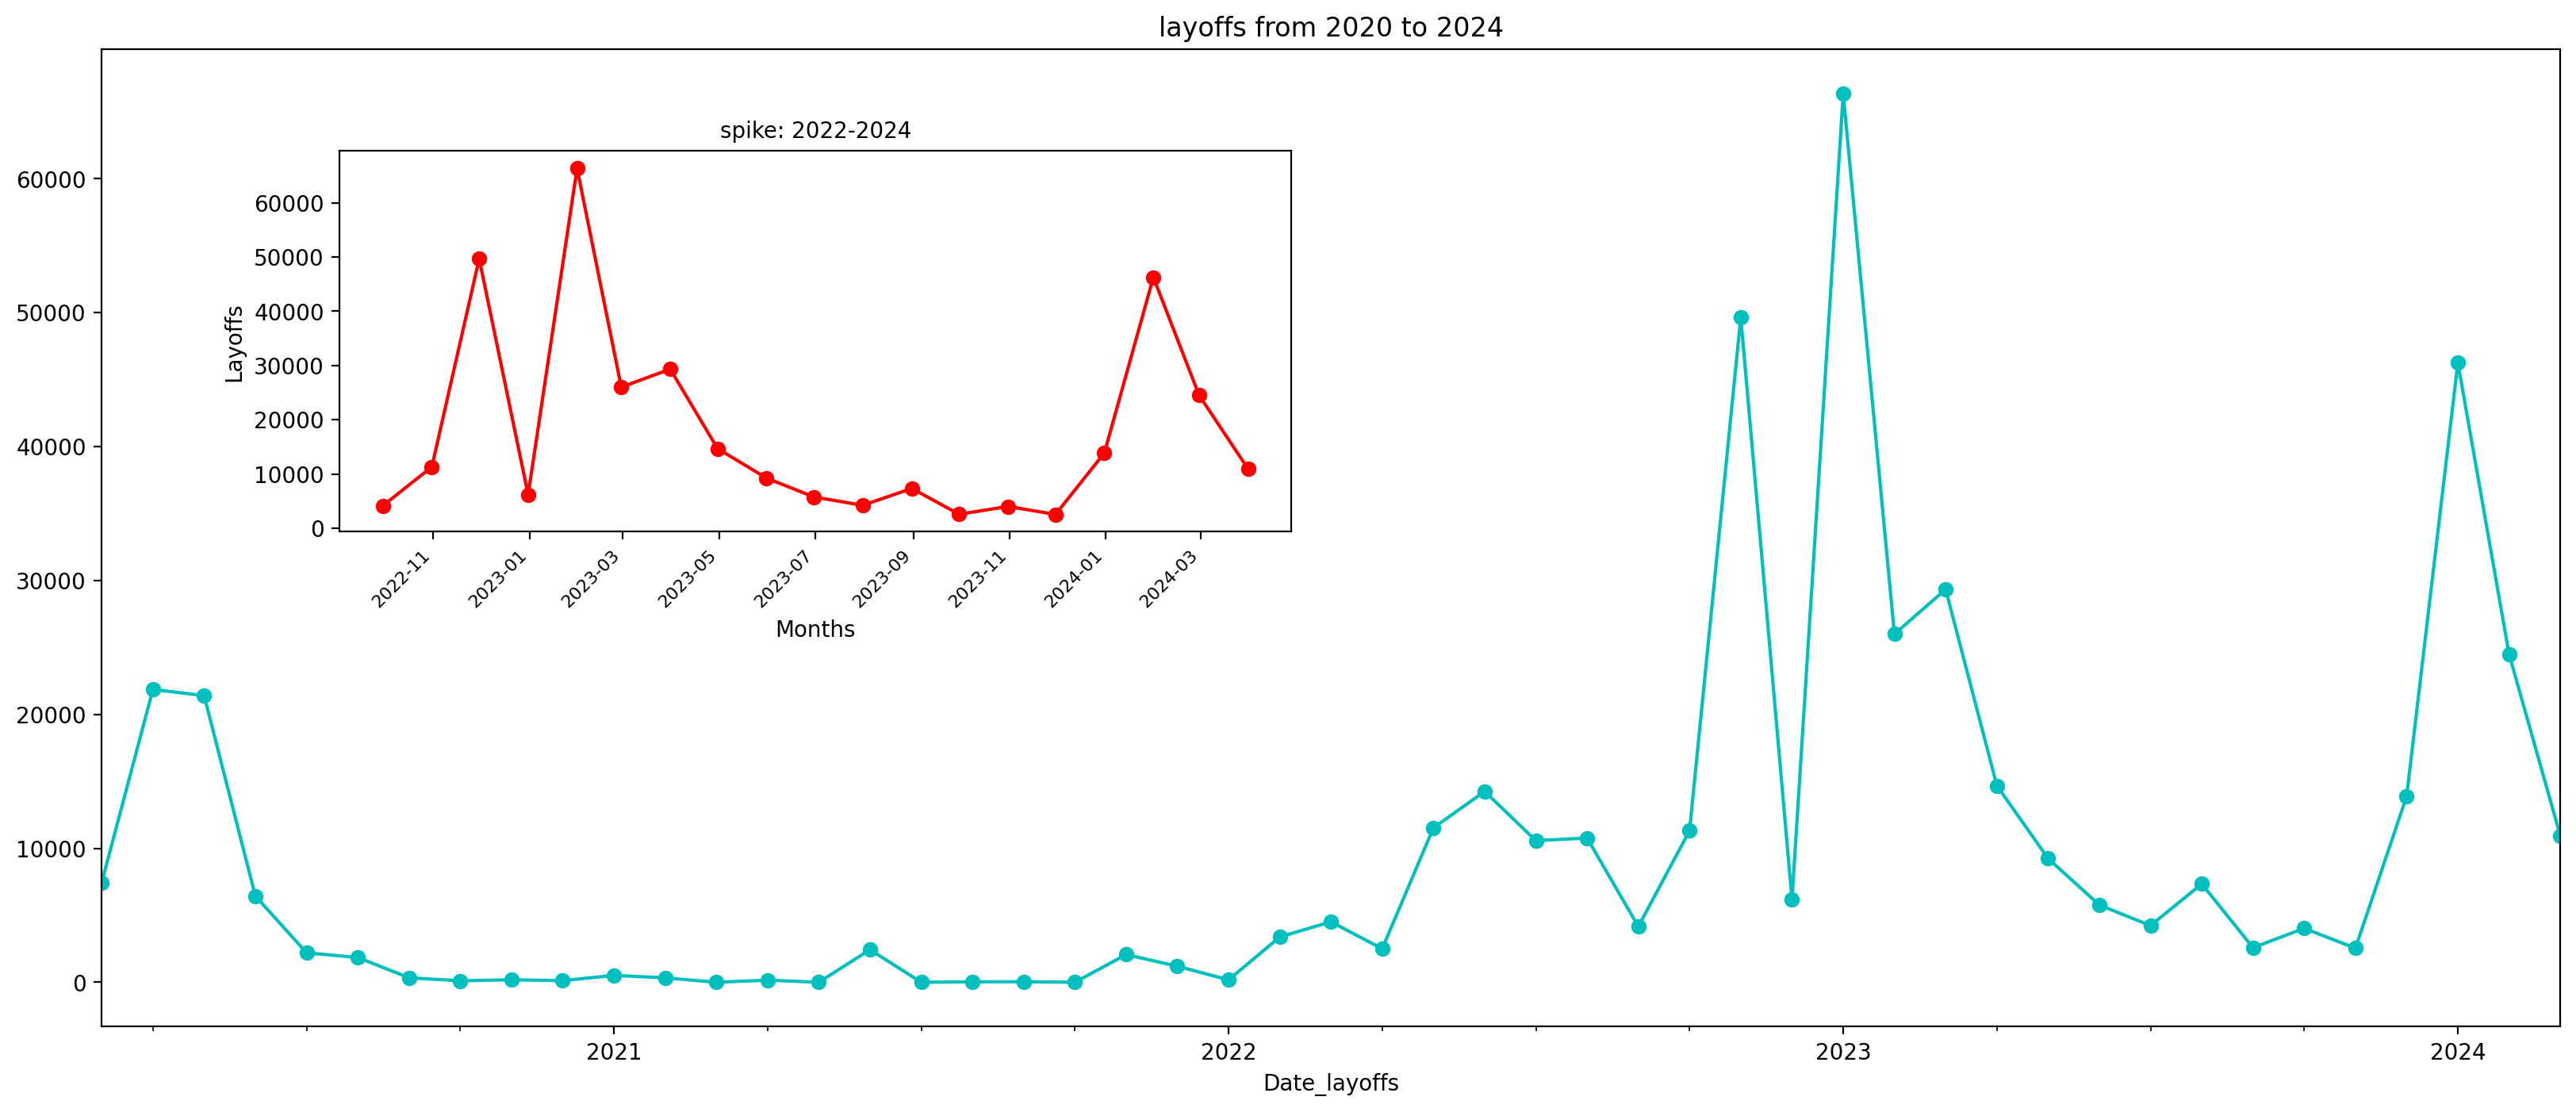

In [57]:
# calculating the monthly layoffs 
monthly_layoffs = df.resample('M', on='Date_layoffs')['Laid_Off'].sum()
#plotting the monthly layoffs against date
plt.figure(figsize=(20,8), dpi= 200)
monthly_layoffs.plot(marker='o', color= 'c', title= 'layoffs from 2020 to 2024')

zoom = plt.axes([0.2,0.5,0.3,0.3])  
zoom.plot(monthly_layoffs['2022-09':'2024-03'].index, 
             monthly_layoffs['2022-09':'2024-03'].values, 
             marker='o', color='r')
zoom.set_title('spike: 2022-2024', fontsize=10)
zoom.grid(True)
plt.setp(zoom.get_xticklabels(), rotation=45, ha='right', fontsize=8)

plt.xlabel('Months')
plt.ylabel('Layoffs')
plt.grid()
plt.tight_layout
plt.show;